In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("spam.csv", encoding = "ISO-8859-1")
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [3]:
df.dropna(axis = 1, inplace = True)

In [4]:
df

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [5]:
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in  stopwords.words('english')]
    return " ".join(text)

In [18]:
clean_txt = []
for text in df.v2:
    clean_txt.append(text_preprocess(text))
df['v2'] = clean_txt


In [19]:
df.head()

v1                                                 v2
0   ham  Go jurong point crazy Available bugis n great ...
1   ham                            Ok lar Joking wif u oni
2  spam  Free entry 2 wkly comp win FA Cup final tkts 2...
3   ham                U dun say early hor U c already say
4   ham        Nah dont think goes usf lives around though

In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.v2)
Y = df.v1

In [30]:
y = df.v1.map({"spam":1, "ham":0})

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20) 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l2')
Spam_model.fit(X_train, Y_train)
pred = Spam_model.predict(X_test)
accuracy_score(Y_test,pred)

0.9449760765550239

In [33]:
from sklearn import metrics


In [34]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [35]:
import matplotlib.pyplot as plt

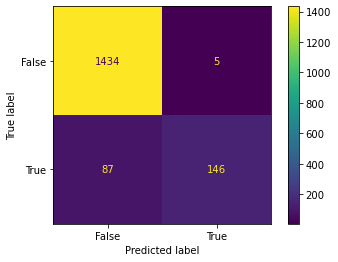

In [36]:
cm_display.plot()
plt.show()

In [37]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [38]:
recall = recall_score(Y_test, pred, average='binary', pos_label = "spam")
recall

0.6266094420600858

In [39]:
precision = precision_score(Y_test, pred, average = 'binary', pos_label = "spam")
precision

0.9668874172185431